In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
import pickle

In [6]:
%cd "~\Google Drive\MAGPIE\data\2016\s0115_16 C RECONNECTION 12 FRAME"
rot=-90-20.7
s0115_16_532=NeLMap2('s0115_16 532nm neL end on.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0115_16_532
s.set_origin(origin=[2429,2265], extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0115_16 C RECONNECTION 12 FRAME


In [9]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"
rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [11]:
%cd "~\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME"
s0125_16_532=NeLMap2('s0125_16 532nm neL.txt', scale=173, rot_angle=-90-21.5, multiply_by=1/1.6)
s=s0125_16_532
s.set_origin(origin=[2724,2197], extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


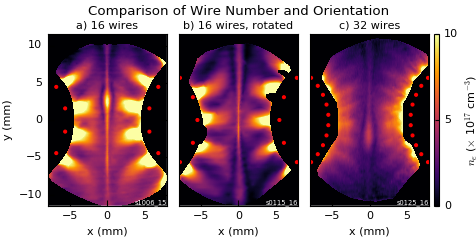

In [55]:
fig, ax=plt.subplots(1,3,figsize=(5.96,3))

clim=[0,10]

shots=[s1006_15_532, s0115_16_532, s0125_16_532]

for a, s in zip(ax, shots):
    im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.set_yticks([])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    a.text(s=s.fn, x=8, y=-11.5, fontsize=6, ha='right', va='bottom', color='white')


a=ax[0]
a.set_ylabel('y (mm)',fontsize=10)
a.set_yticks([-10,-5,0,5,10])


#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.0, right=0.9, top=1,
                wspace=0.1, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.14, 0.01, 0.72])#l,b,w,h
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
fig.colorbar(im, cax=cbar_ax, ticks=[0,5,10])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)

a=ax[0]
th=np.linspace(-360/32*3,360/32*3,4)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    
a=ax[1]
th=np.linspace(-360/32*4,360/32*4,5)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    
a=ax[2]
th=np.linspace(-360/32*4,360/32*4,10)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)

fig.suptitle('Comparison of Wire Number and Orientation', fontsize=12)

ax[0].set_title('a) 16 wires', fontsize=10)
ax[1].set_title('b) 16 wires, rotated', fontsize=10)
ax[2].set_title('c) 32 wires', fontsize=10)


In [56]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter7_wire_number_comparison.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Vertical Thomson

In [3]:
import csv
class TS_fibre_data:
    def __init__(self, fn):
        shift=[]
        Background=[]
        Response=[]
        Shot=[]
        Fit=[]

        with open(fn, 'r',newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader)
            next(reader)
            for row in reader:
                shift.append(float(row[0]))
                Background.append(float(row[1]))
                Response.append(float(row[2]))
                Shot.append(float(row[3]))
                Fit.append(float(row[4]))

        self.shift=np.asarray(shift)
        self.Background=np.asarray(Background)
        self.Response=np.asarray(Response)
        self.Shot=np.asarray(Shot)
        self.Fit=np.asarray(Fit)

%cd "~\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz\s0822_16 TS"
ts=np.loadtxt('s0822_16 shot.asc')
ts=np.rot90(ts)
l0=1004
w=38
roi=np.flipud(ts[250:-15,l0-w:l0+w])

B8=TS_fibre_data("s0822_16 TS F8B.dat")
B14=TS_fibre_data("s0822_16 TS F14B.dat")

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz\s0822_16 TS


In [4]:
%cd "~\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz"
rot=-90
s0822_16_532=NeLMap2('s0822_16 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0822_16_532
s.set_origin(origin=(2199,1484), extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [5]:
import csv
fn='s0822_16 pin positions.txt'
fibre=[]
xx=[]
yy=[]
with open(fn, 'r',newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        fibre.append(float(row[0]))
        xx.append(float(row[1]))
        yy.append(float(row[2]))
        
fibre=np.asarray(fibre)
x=s.data.shape[1]-np.asarray(yy)
y=np.asarray(xx)

xx_mm=(x-s.origin[1])/s.scale
yy_mm=(s.origin[0]-y)/s.scale

In [6]:
xm, xc=np.polyfit(fibre,xx_mm, 1)
ym, yc=np.polyfit(fibre, yy_mm, 1)
scale=1 #useful if pin positions taken at different scale to shot
y_mm=lambda f: scale*f*ym+yc
x_mm=lambda f: scale*f*xm+xc

<IPython.core.display.Javascript object>


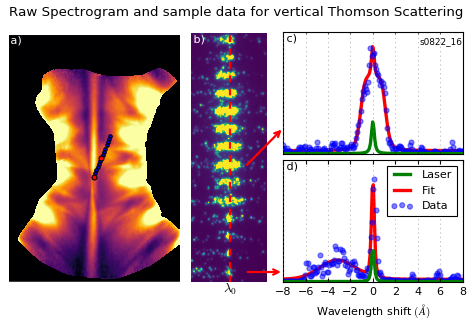

In [69]:
fig=plt.figure(figsize=(5.9,4))

ax1=fig.add_axes([0.38, 0.12, 0.2, 0.78])#l,b,w,h
ax1.imshow(roi, clim=[620,2000], cmap=cmaps.viridis, interpolation='none')
ax1.plot([38,38],[0,247], lw=2, color='red', ls='--')
ax1.set_ylim([0,248])
ax1.axis('off')
ax1.text(x=38, y=0, va='top',ha='center',s=r'$\lambda_0$', fontsize=12)
ax1.text(x=0.1, y=0.99, va='top',ha='left',s=r' b)', color='white',fontsize=10,transform=ax1.transAxes)

ax4=fig.add_axes([0, 0.02, 0.4, 0.97])#l,b,w,h
ax4.axis('off')
s.plot_data_mm(ax=ax4, clim=[0,10], multiply_by=1e-17)
fib=range(1,15)
ax4.scatter([x_mm(i) for i in fib],[y_mm(i) for i in fib], s=10)
ax4.scatter([x_mm(i) for i in [8,14]],[y_mm(i) for i in [8,14]], c='red',s=20)




c3l=0.6
c3w=0.38
ax2=fig.add_axes([c3l, 0.52, c3w, 0.38])#l,b,w,h
ax3=fig.add_axes([c3l, 0.12, c3w, 0.38])#l,b,w,h


for a, f in zip([ax2,ax3], [B8, B14]):
    r=0.3*f.Shot.max()/f.Response.max()
    a.plot(f.shift, f.Response*r, lw=3, color='green', label='Laser')
    a.plot(f.shift, f.Fit, lw=3, color='red', label='Fit',zorder=1)
    a.scatter(f.shift, f.Shot, color='blue', marker='o', label='Data',zorder=2, alpha=0.5)

    a.set_ylim([0,None])
    a.tick_params(labelsize=10, pad=5, length=4, width=1)
    a.set_yticks([])

    a.xaxis.set_minor_locator(MultipleLocator(2))
    a.xaxis.set_major_locator(MultipleLocator(2))
    a.grid(which='minor', color='gray',linestyle=':')
    
ax3.legend(fontsize=10, loc=1)
ax2.axes.get_xaxis().set_ticks([])
ax3.set_xlim([-8,8])
ax2.set_xlim([-8,8])


ax3.set_xlabel(r'Wavelength shift $(\AA)$',fontsize=10)
ax2.text(x=0, y=0.99, va='top',ha='left',s=r' c)',transform=ax2.transAxes,fontsize=10)
ax3.text(x=0, y=0.99, va='top',ha='left',s=r' d)',transform=ax3.transAxes,fontsize=10)
ax2.text(x=1, y=0.96, va='top',ha='right',s='s0822_16',transform=ax2.transAxes,fontsize=8)

fig.text(x=0.015, y=0.89, va='top',ha='left',s=r' a)',fontsize=10, color='white')


fig.suptitle('Raw Spectrogram and sample data for vertical Thomson Scattering', fontsize=12)

ax1.annotate('',xy=(0.6,0.6),xycoords='figure fraction',xytext=(0.52,0.48),
             arrowprops=dict(arrowstyle='->',fc='red',ec="red",lw=2))

ax1.annotate('',xy=(0.6,0.15),xycoords='figure fraction',xytext=(0.52,0.15),
             arrowprops=dict(arrowstyle='->',fc='red',ec="red",lw=2))

In [70]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter7_vertical_thomson_data.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# End-on Faraday

In [2]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday"
R0fn="s0701_16_102155_c1.png"
R1fn="s0701_16_102202_c2.png"
B0fn="s0701_16_103044_c1.png"
B1fn="s0701_16_103051_c2.png"
S0fn="s0701_16_112804_c1.png"
S1fn="s0701_16_112811_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-90)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday


In [3]:
t=pickle.load(open("s0701_16 faraday registration.p", "rb"))
s.register(transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [23]:
s.scale=59
extent=[-13,13,-9,9]
s.set_origin((1853,1287), extent=extent)

In [17]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday"
I0fn="s0701_16 IR end on interferometry (2).JPG"
nefn="s0701_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday


C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [18]:
t=pickle.load(open("s0701_16 interferometry transform.p", "rb"))
b.register(transform=t)

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:235: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


In [24]:
b.scale=s.scale
b.set_origin(s.origin, extent=extent)
#b.plot_data_mm(clim=[-3,3])

In [20]:
b_map=b.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

In [ ]:
s0701_16_ne=NeLMap2('s0701_16 IR neL.txt', scale=s.scale) 
ne=s0701_16_ne
ne.data=b.I1T
ne.scale=s.scale

In [25]:
ne.set_origin(origin=s.origin, extent=extent)

<IPython.core.display.Javascript object>


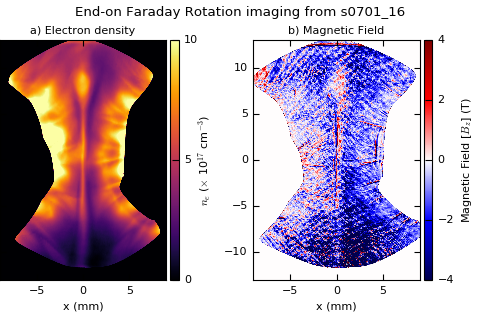

In [151]:
fig, ax=plt.subplots(1,2, figsize=(6,4))
ne_im=ax[0].imshow(ne.data_c/1.6e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
mag_im=ax[1].imshow(b_map, extent=b.extent, clim=[-4,4], cmap='seismic')

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('a) Electron density', fontsize=10)
ax[1].set_title('b) Magnetic Field', fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10, labelpad=-2)


divider1 = make_axes_locatable(ax[1])
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(mag_im, cax=c, ticks
             =[-4, -2,0,2,4])
c.set_ylabel(r'Magnetic Field [$B_z$] (T)',fontsize=10)

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9,
                wspace=0.42, hspace=0.1)

#colour bars
for c in [cbar_ax0,cbar_ax1]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("End-on Faraday Rotation imaging from s0701_16", fontsize=12)

In [152]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter7_end_on_faraday.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

In [65]:
import copy
bzoom=copy.copy(b)
bzoom.set_origin(s.origin, extent=[yy-2,yy+2,-xx,xx])

(295, 354) (295, 708)


<IPython.core.display.Javascript object>


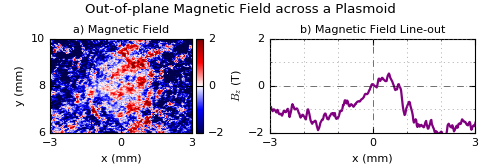

In [143]:
xx=3
yy=8
w=4
b.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=w*b.scale)

clim=[-2,2]

fig, ax=plt.subplots(1,2, figsize=(6,2.1))
mag_im=ax[0].imshow(bzoom.data_c, extent=[-xx,xx,yy-w/2,yy+w/2], clim=clim, cmap='seismic')
ax[1].plot(b.mm,b.lo, lw=2, c='purple')

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-xx,0,xx])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
ax[0].set_yticks([yy-w/2,yy,yy+w/2])
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('a) Magnetic Field', fontsize=10)

ax[1].set_xlim([-xx,xx])
ax[1].set_ylim(clim)
ticks=[clim[0],0,clim[1]]
ax[1].set_yticks(ticks)

ax[1].xaxis.set_minor_locator(MultipleLocator(1))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].grid(which='minor', color='gray',linestyle=':')
ax[1].grid(which='major',linestyle='--')
ax[1].set_title('b) Magnetic Field Line-out', fontsize=10)

divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(mag_im, cax=c, ticks=ticks)
c.set_ylabel(r'$B_z$ (T)',fontsize=10, labelpad=+5)

plt.subplots_adjust(left=0.05, bottom=0.21, right=0.99, top=0.77,
                wspace=0.2, hspace=0.1)

#colour bars
for c in [cbar_ax0]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("Out-of-plane Magnetic Field across a Plasmoid", fontsize=12)

In [144]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter7_end_on_faraday_lineouts.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

In [64]:
[yy+2,yy-2,-xx,xx]

[10, 6, -2, 2]

In [100]:
ax[1]